## sweetz

In [1]:
pip install markupsafe==2.0.1

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install ipywidgets

In [6]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

In [8]:
import sweetviz
import pandas as pd

In [10]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [11]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [12]:
# Parents/Children
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [13]:
# Number of Siblings/Spouses
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

We now have 2 dataframes (train and test), and we would like to analyze the target value “Survived”. I want to point out in this case we know the name of the target column in advance, but it is always optional to specify a target column. We can generate a report with this line of code:

In [15]:
my_report = sweetviz.compare([train, "Train"], [test, "Test"], "Survived")

                                             |          | [  0%]   00:00 -> (? left)

Running this command will perform the analysis and create the report object. To get the output, simply use the show_html() command:

In [16]:
my_report.show_html("Report.html") # Not providing a filename will default to SWEETVIZ_REPORT.html

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### FeatureConfig: forcing data types, skipping columns
In many cases, there are “label” columns that you may not want to analyze (although target analysis can provide insights on the distribution of target values based on labeling). In other cases, you may want to force some values to be marked as categorical even though they are numerical in nature.

To do all this, simply create a FeatureConfig object and pass it in to the analyze/compare function. You can specify either a string or a list to kwargs skip, force_cat and force_text:

In [17]:
feature_config = sweetviz.FeatureConfig(skip="PassengerId", force_cat=["Ticket"])
my_report = sweetviz.compare([train, "Train"], [test, "Test"], "Survived", feature_config)

                                             |          | [  0%]   00:00 -> (? left)

#### Comparing sub-populations (e.g. Male vs Female)
Even if you are only looking at a single dataset, it can be very useful to study the characteristics of different subpopulations within that dataset. To do so, Sweetviz provides the compare_intra() function. To use it, you provide a boolean test that splits the population (here we try train["Sex"] == 'male', to get a sense of the different gender populations), and give a name to each subpopulation. For example:

In [18]:
my_report = sweetviz.compare_intra(train, train["Sex"] == 'male', ["Male", "Female"], 'Survived')
my_report.show_html() # Not providing a filename will default to SWEETVIZ_REPORT.html

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


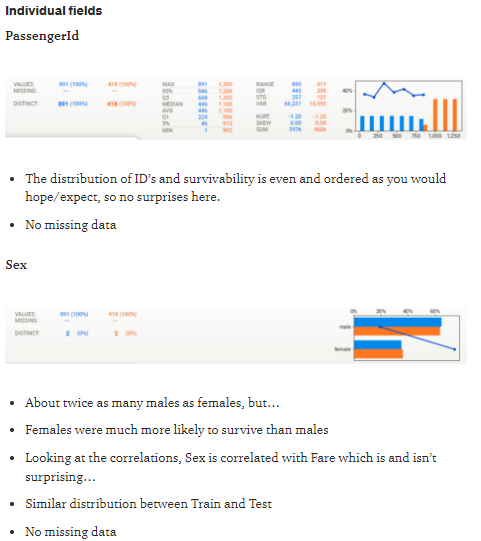

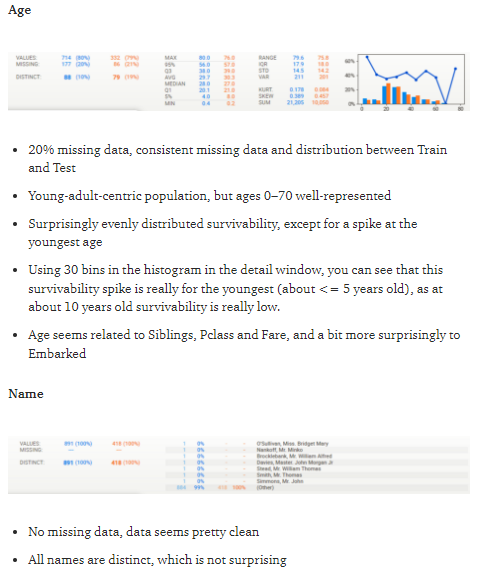

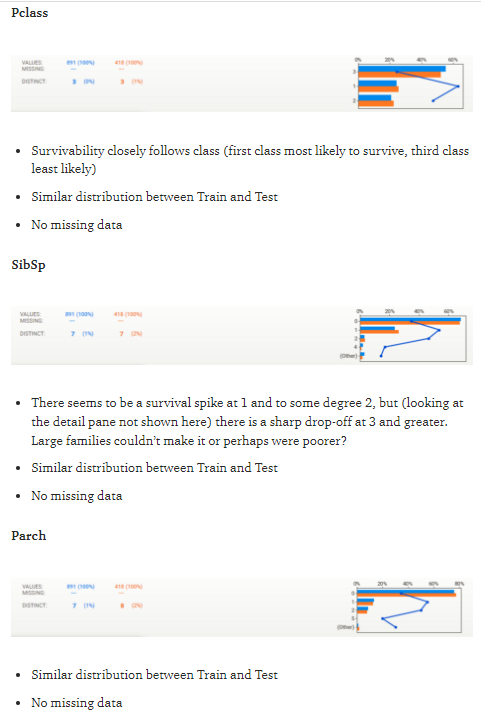

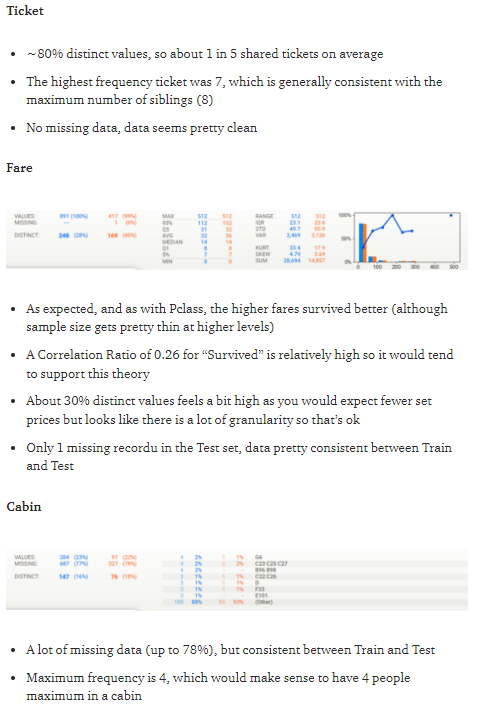

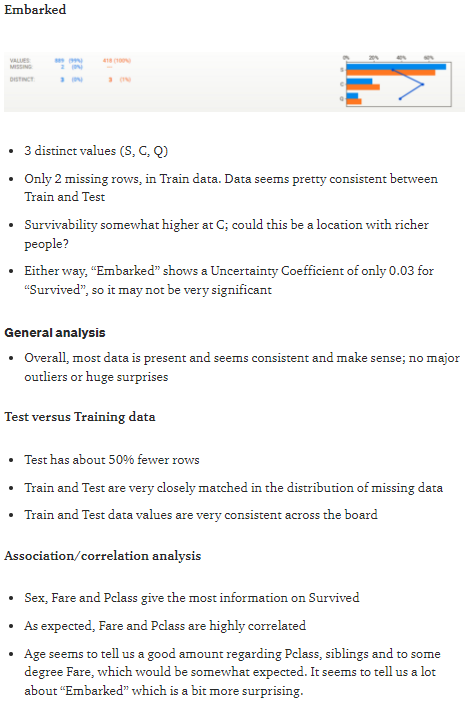

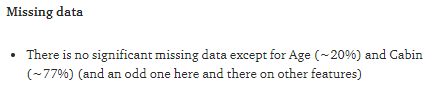

## Profiling

In [19]:
import pandas as pd

In [21]:
pip install ruamel-yaml 

  Using cached ruamel.yaml-0.17.21-py3-none-any.whl (109 kB)
  Using cached ruamel.yaml.clib-0.2.6-cp39-cp39-win_amd64.whl (118 kB)
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install pandas-profiling

  Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl (262 kB)
  Using cached phik-0.12.2-cp39-cp39-win_amd64.whl (685 kB)
  Using cached multimethod-1.8-py3-none-any.whl (9.8 kB)
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Using cached pydantic-1.9.2-cp39-cp39-win_amd64.whl (2.0 MB)
  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Using cached MarkupSafe-2.1.1-cp39-cp39-win_amd64.whl (17 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas_profiling

In [24]:
# importing the data
df5 = pd.read_csv('titanic.csv')

In [25]:
pandas_profiling.ProfileReport(df5)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
df5.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [27]:
# importing the data
df6 = pd.read_csv('StudentPerformance.csv')

In [28]:
pandas_profiling.ProfileReport(df6)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
df6.corr()

math score  reading score  writing score  Unnamed: 8
math score       1.000000       0.817580       0.802642         NaN
reading score    0.817580       1.000000       0.954598         NaN
writing score    0.802642       0.954598       1.000000         NaN
Unnamed: 8            NaN            NaN            NaN         NaN